In [6]:
import sys
sys.path.insert(0, '../gofher')

import os
import matplotlib.image as mpimg

from gofher import run_gofher
from visualize import visualize


In [7]:
name = "IC1755"
paper_label = "SW"
folder = "figure8"

In [8]:
path_to_input = "..\\..\\..\\spin-parity-catalog-data\\panstarrs\\{}".format(folder)
path_to_output = "..\\..\\..\\..\\"

In [9]:
def get_fits_path(name,band):
    """the file path of where existing fits files can be found"""
    return os.path.join(path_to_input,name,"{}_{}.fits".format(name,band))

def get_color_image_path(name):
    return os.path.join(path_to_input,name,"{}_color.jfif".format(name))

W



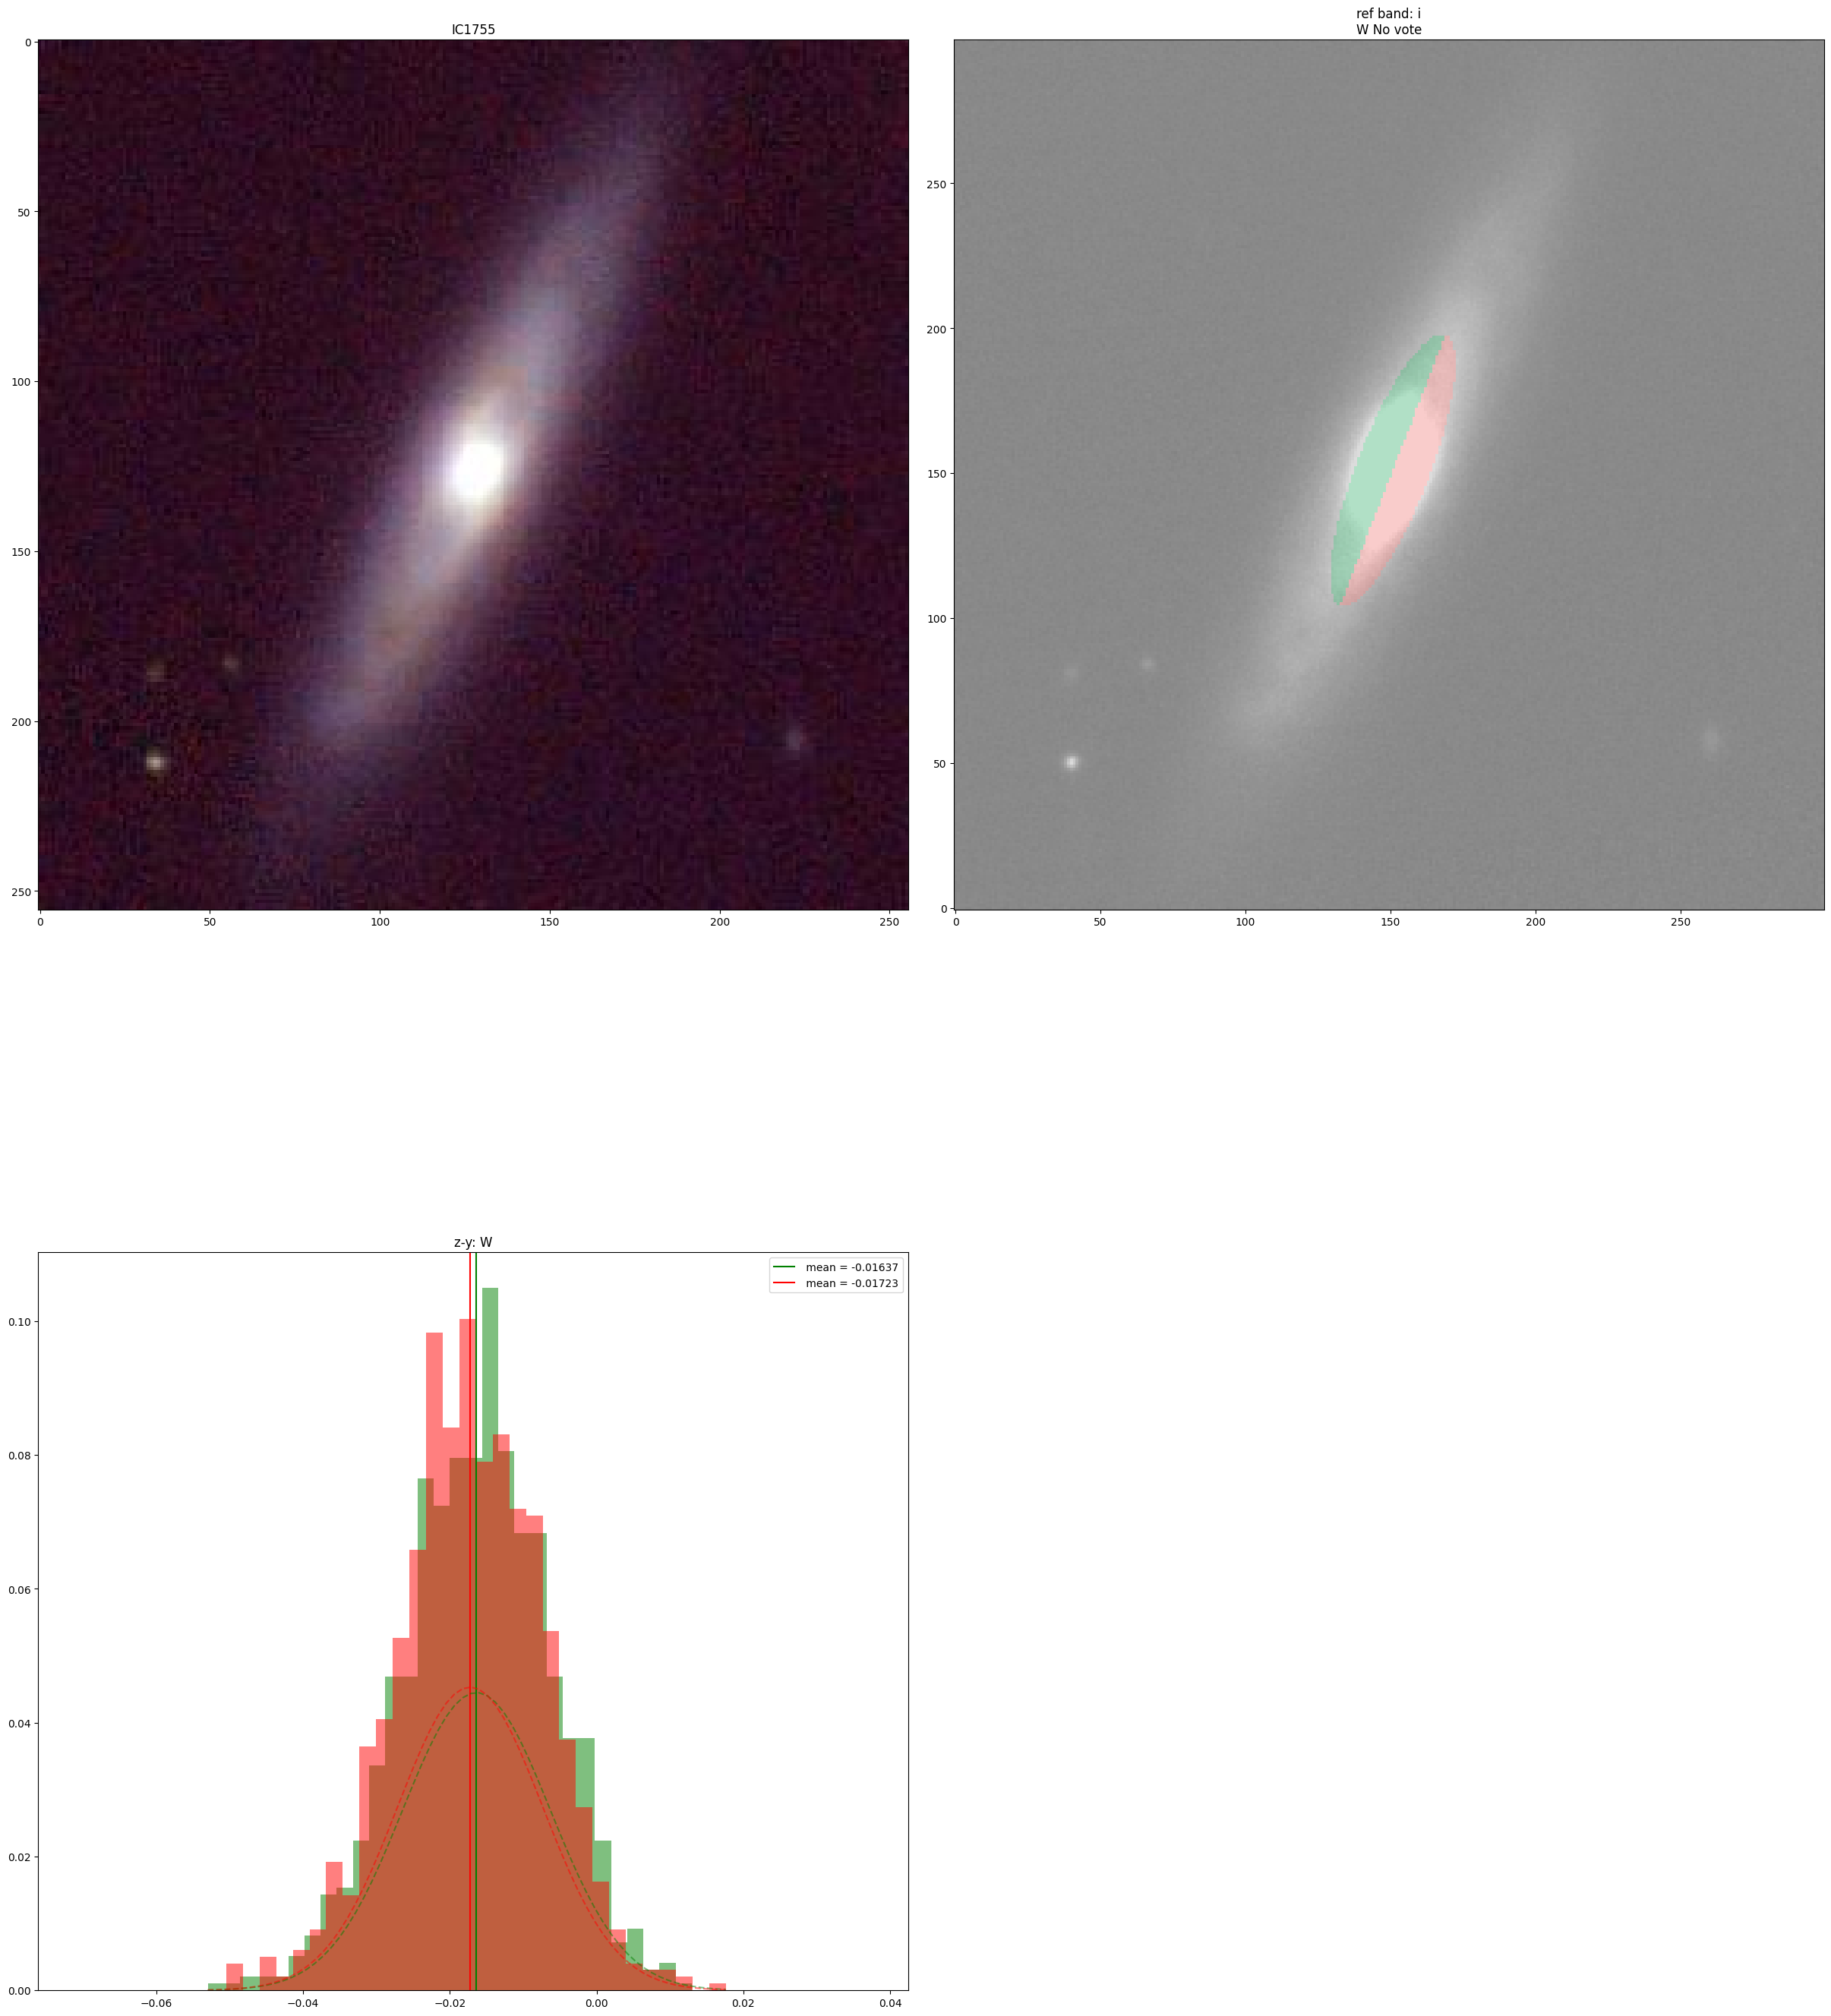

In [10]:
gal = run_gofher(name,get_fits_path,['g','r','i','z','y'],['i','z','y','r'], paper_label)

color_image = color = mpimg.imread(get_color_image_path(name))
visualize(gal,color_image,['z','y'],paper_label)